In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
df = pd.read_csv("titanic.csv")  # Replace with your file path if different


In [3]:
# Display the first few rows of the dataset
print(df.head())

# Get basic statistics for numeric columns
print(df.describe())

# Display info about data types and non-null counts
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [4]:
# Check for missing values
print(df.isnull().sum())

# Handling missing values: Fill 'Age' with median, 'Embarked' with mode
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify if missing values are handled
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


C:\Users\deoka\AppData\Local\Temp\ipykernel_7092\257226741.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\deoka\AppData\Local\Temp\ipykernel_7092\257226741.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [5]:
# Checking for outliers in 'Fare' and 'Age' columns
# Define function to detect outliers using IQR
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detecting outliers
age_outliers = detect_outliers(df, 'Age')
fare_outliers = detect_outliers(df, 'Fare')

print(f"Age outliers:\n{age_outliers}")
print(f"Fare outliers:\n{fare_outliers}")

# Remove or cap outliers (example of capping for 'Fare')
df['Fare'] = np.where(df['Fare'] > df['Fare'].quantile(0.99), df['Fare'].quantile(0.99), df['Fare'])


Age outliers:
     PassengerId  Survived  Pclass  \
7              8         0       3   
11            12         1       1   
15            16         1       2   
16            17         0       3   
33            34         0       2   
..           ...       ...     ...   
827          828         1       2   
829          830         1       1   
831          832         1       2   
851          852         0       3   
879          880         1       1   

                                              Name     Sex    Age  SibSp  \
7                   Palsson, Master. Gosta Leonard    male   2.00      3   
11                        Bonnell, Miss. Elizabeth  female  58.00      0   
15                Hewlett, Mrs. (Mary D Kingcome)   female  55.00      0   
16                            Rice, Master. Eugene    male   2.00      4   
33                           Wheadon, Mr. Edward H    male  66.00      0   
..                                             ...     ...    ...    ... 

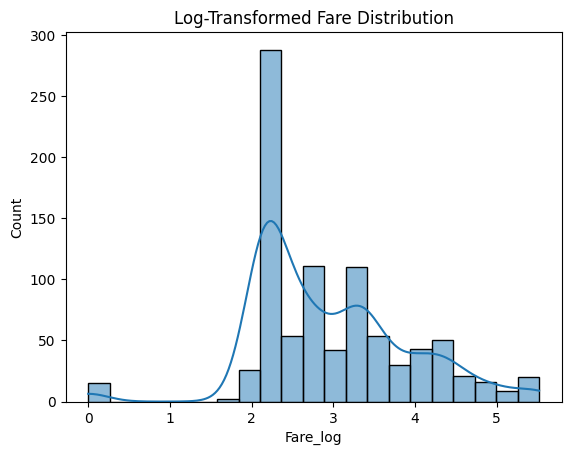

In [6]:
# Log transformation on 'Fare' to reduce skewness
df['Fare_log'] = np.log1p(df['Fare'])  # log(1+Fare) to avoid log(0) errors

# Visualize transformation effect
sns.histplot(df['Fare_log'], kde=True)
plt.title("Log-Transformed Fare Distribution")
plt.show()


In [7]:
# Convert 'Sex' to binary values (0 for female, 1 for male)
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# Convert 'Embarked' using one-hot encoding
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Fare_log  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN  2.110213       False        True  
1          PC 17599  71.2833   C85  4.280593       False       False  
2  STON/O2. 3101282   7.9250   NaN  2.188856       False        True  
3           